Importando lib e abrindo o dataset


Link dataset: https://www.kaggle.com/datasets/divyansh22/summer-olympics-medals


In [15]:
# import libraries
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [16]:
df = pd.read_csv('db_olimpiadas.csv',encoding='latin1')
df.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


1. Evolução Temporal das Medalhas \
Vamos analisar como o número de medalhas variou ao longo dos anos.



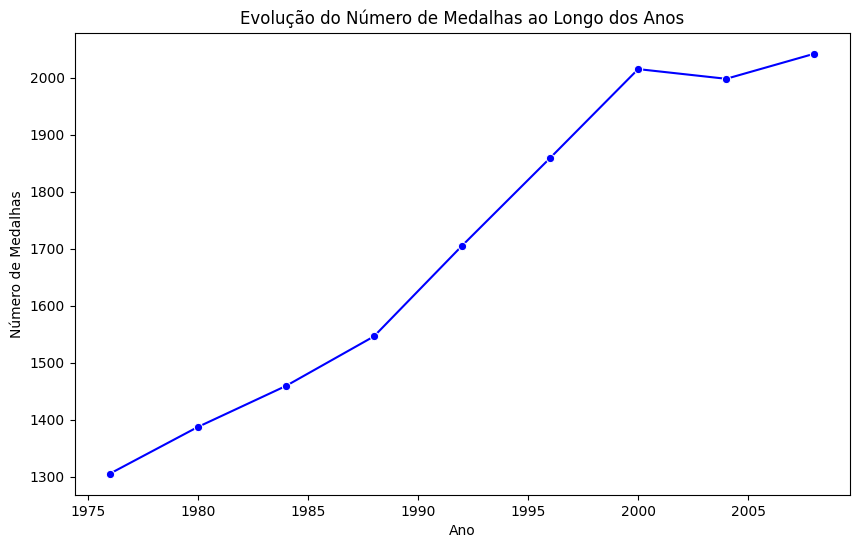

In [17]:
# Contar o número de medalhas por ano
medals_by_year = df.groupby('Year')['Medal'].count().reset_index()

# Plotar a evolução temporal com seaborn e matplotlib
plt.figure(figsize=(10, 6))
sns.lineplot(data=medals_by_year, x='Year', y='Medal', marker='o', color='blue')
plt.title('Evolução do Número de Medalhas ao Longo dos Anos')
plt.ylabel('Número de Medalhas')
plt.xlabel('Ano')
plt.show()


2. Análise de Gênero (Gráfico de Barras por Gênero)

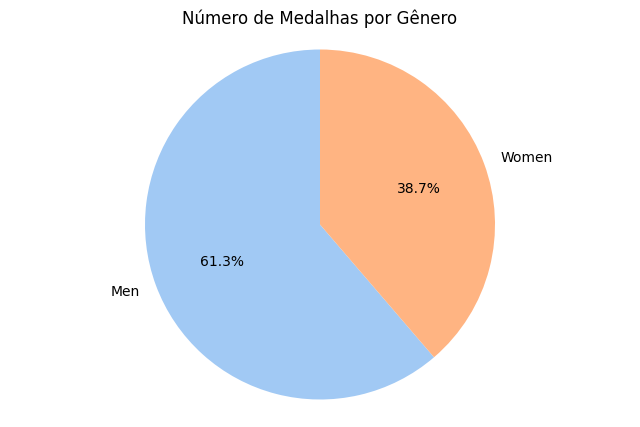

In [36]:
# Contar o número de medalhas por gênero
medals_by_gender = df.groupby('Gender')['Medal'].count().reset_index()

# Plotar gráfico de pizza com matplotlib
plt.figure(figsize=(8, 5))
plt.pie(medals_by_gender['Medal'], labels=medals_by_gender['Gender'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Número de Medalhas por Gênero')
plt.axis('equal')  # Para garantir que o gráfico seja desenhado como um círculo
plt.show()


3. Distribuição de Medalhas por Esporte (Gráfico de Barras)

C:\Users\Pedro Venancio\AppData\Local\Temp\ipykernel_8268\3010773979.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




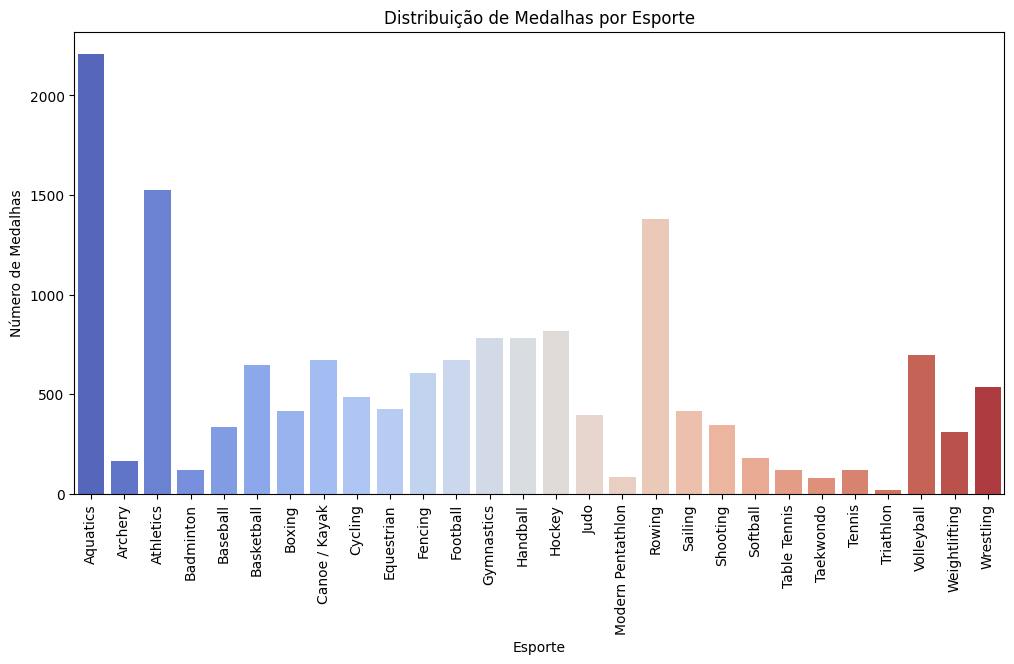

In [22]:
# Contar o número de medalhas por esporte
medals_by_sport = df.groupby('Sport')['Medal'].count().reset_index()

# Plotar com matplotlib e seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=medals_by_sport, x='Sport', y='Medal', palette='coolwarm')
plt.title('Distribuição de Medalhas por Esporte')
plt.xticks(rotation=90)
plt.ylabel('Número de Medalhas')
plt.xlabel('Esporte')
plt.show()

4. Tipo de medalha por País

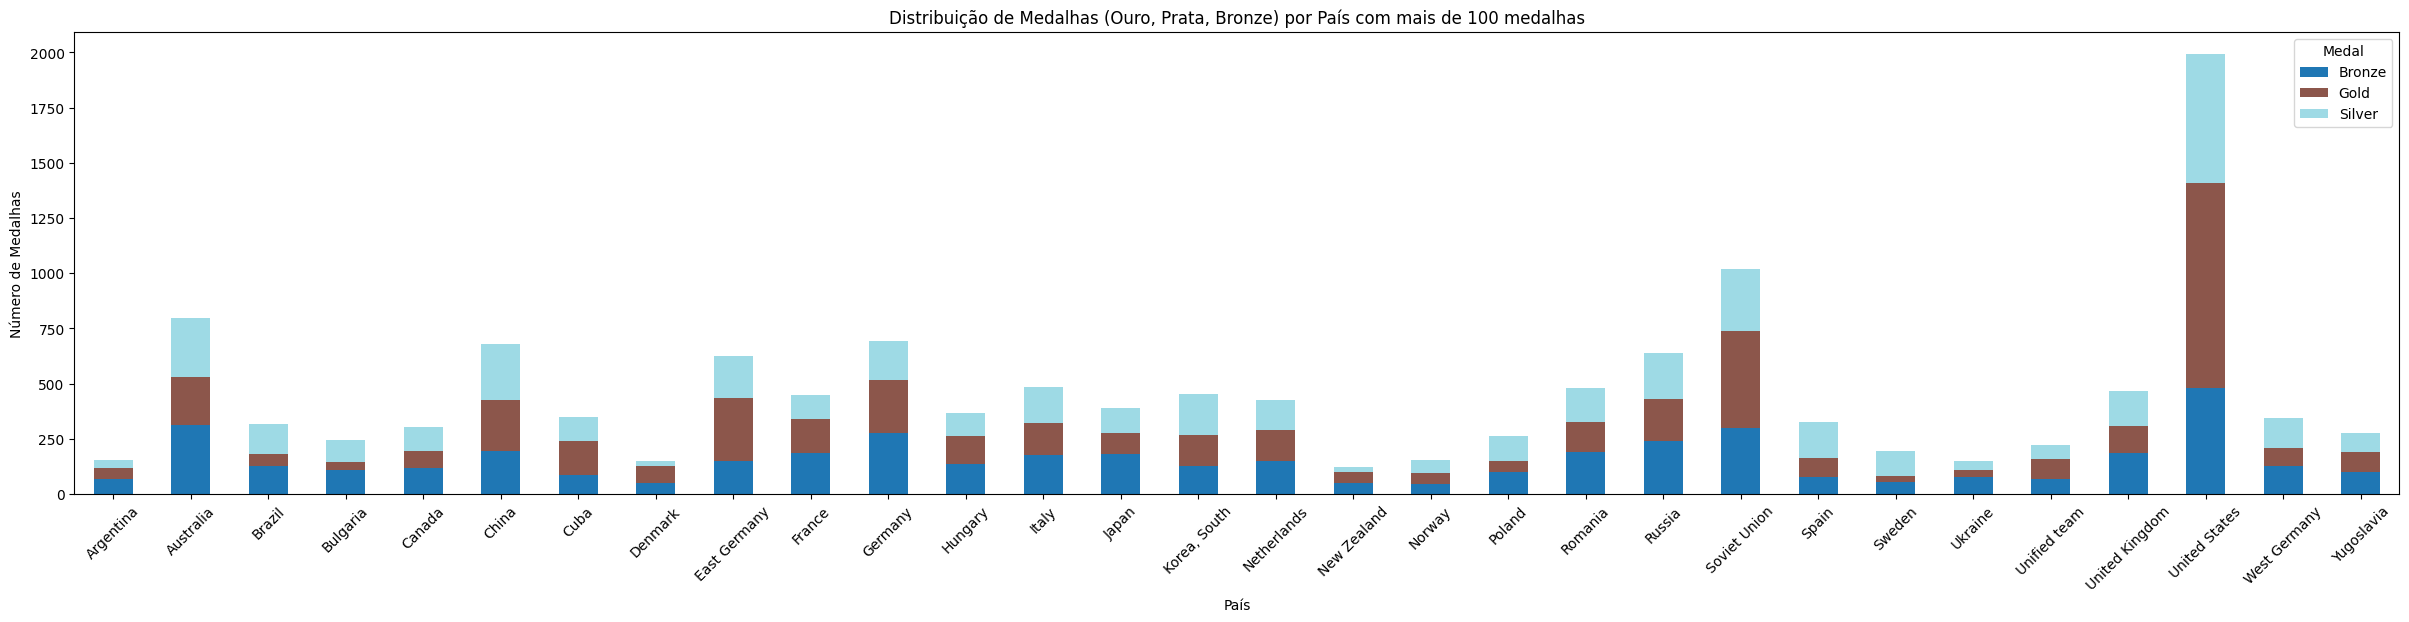

In [30]:
# Contar o número de medalhas por país e tipo
medals_by_type = df.groupby(['Country', 'Medal'])['Medal'].count().unstack().fillna(0)

# Somar o total de medalhas por país (somando colunas Ouro, Prata, Bronze)
medals_by_type['Total'] = medals_by_type.sum(axis=1)

# Filtrar países com pelo menos uma medalha
medals_by_type_filtered = medals_by_type[medals_by_type['Total'] > 100].drop(columns='Total')

# Plotar com matplotlib (barras empilhadas)
medals_by_type_filtered.plot(kind='bar', stacked=True, figsize=(30, 6), colormap='tab20')
plt.title('Distribuição de Medalhas (Ouro, Prata, Bronze) por País com mais de 100 medalhas')
plt.ylabel('Número de Medalhas')
plt.xlabel('País')
plt.xticks(rotation=45)
plt.show()

5. Análise de Gênero ao Longo do Tempo (Gráfico de Linha Separado por Gênero) \
   Mostra a como a equidade de genero evoluiu ao longo do tempo

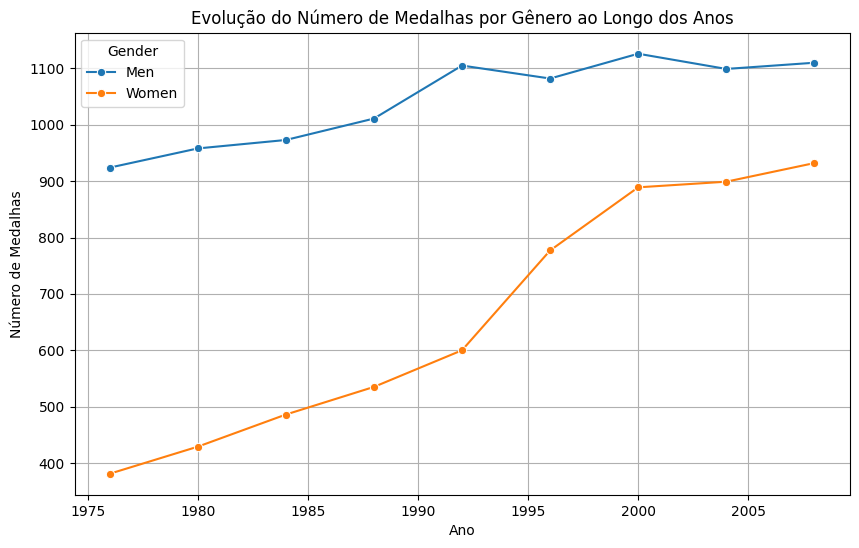

In [25]:
# Contar o número de medalhas por ano e gênero
medals_by_year_gender = df.groupby(['Year', 'Gender'])['Medal'].count().reset_index()

# Plotar com matplotlib e seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=medals_by_year_gender, x='Year', y='Medal', hue='Gender', marker='o')
plt.title('Evolução do Número de Medalhas por Gênero ao Longo dos Anos')
plt.ylabel('Número de Medalhas')
plt.xlabel('Ano')
plt.grid(True)
plt.show()

6. Medalhas do brasil ao longo do tempo



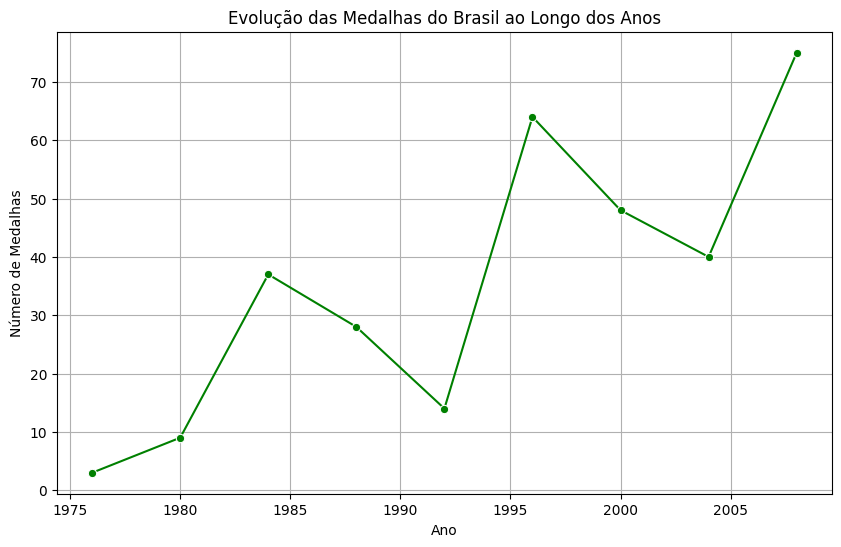

In [31]:
# Filtrar o DataFrame para o Brasil
brazil_medals = df[df['Country'] == 'Brazil']

# Contar o número de medalhas por ano para o Brasil
brazil_medals_by_year = brazil_medals.groupby('Year')['Medal'].count().reset_index()

# Plotar com matplotlib e seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=brazil_medals_by_year, x='Year', y='Medal', marker='o', color='green')
plt.title('Evolução das Medalhas do Brasil ao Longo dos Anos')
plt.ylabel('Número de Medalhas')
plt.xlabel('Ano')
plt.grid(True)
plt.show()

7. Esportes que o brasil recebeu mais medalhas

C:\Users\Pedro Venancio\AppData\Local\Temp\ipykernel_8268\2221858901.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




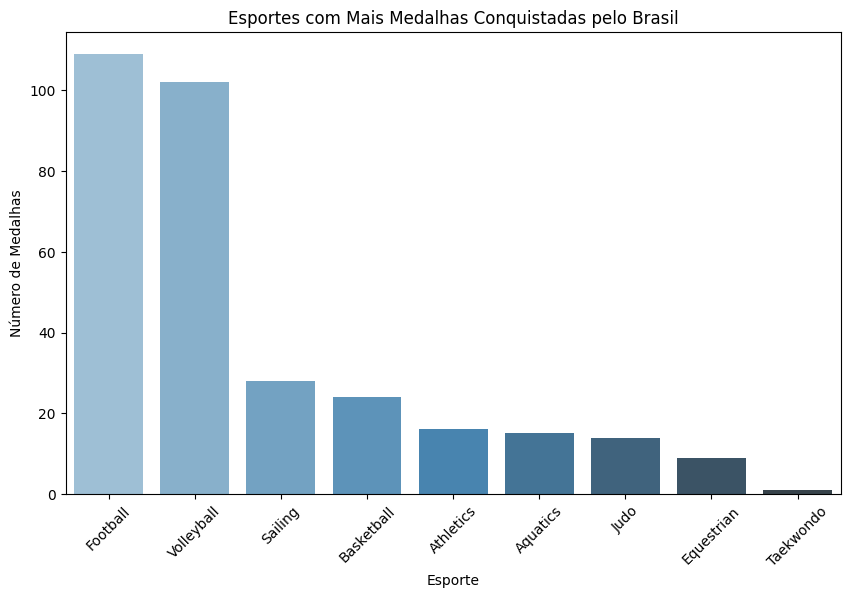

In [35]:
# Filtrar o DataFrame para o Brasil
brazil_medals = df[df['Country'] == 'Brazil']

# Contar o número de medalhas por esporte para o Brasil
brazil_medals_by_sport = brazil_medals.groupby('Sport')['Medal'].count().reset_index()

# Ordenar pelo número de medalhas
brazil_medals_by_sport = brazil_medals_by_sport.sort_values(by='Medal', ascending=False)

# Plotar com matplotlib e seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=brazil_medals_by_sport, x='Sport', y='Medal', palette='Blues_d')
plt.title('Esportes com Mais Medalhas Conquistadas pelo Brasil')
plt.ylabel('Número de Medalhas')
plt.xlabel('Esporte')
plt.xticks(rotation=45)
plt.show()
